Visualization of Temporal Series EDA

In [148]:
import matplotlib.pyplot as plt
import pandas as pd

In [149]:
btc_data = pd.read_csv('./Data/btc_data_aligned_with_sp500.csv', encoding='cp1252')
sp500_data = pd.read_csv('./Data/sp500_data_aligned_with_btc_data.csv', encoding='cp1252')

# Changing the 'Date' type to datetime64
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
sp500_data['Date'] = pd.to_datetime(sp500_data['Date'])

# Rename the 'Close' and 'Volume' columns for clarity in both datasets
btc_data.rename(columns={"Close": "BTC_Price"}, inplace=True)
sp500_data.rename(columns={"Close": "SP500_Price"}, inplace=True)

btc_data.rename(columns={"Volume": "BTC_Volume"}, inplace=True)
sp500_data.rename(columns={"Volume": "SP500_Volume"}, inplace=True)

#### Quick review for each dataset graphs, closing price over the time

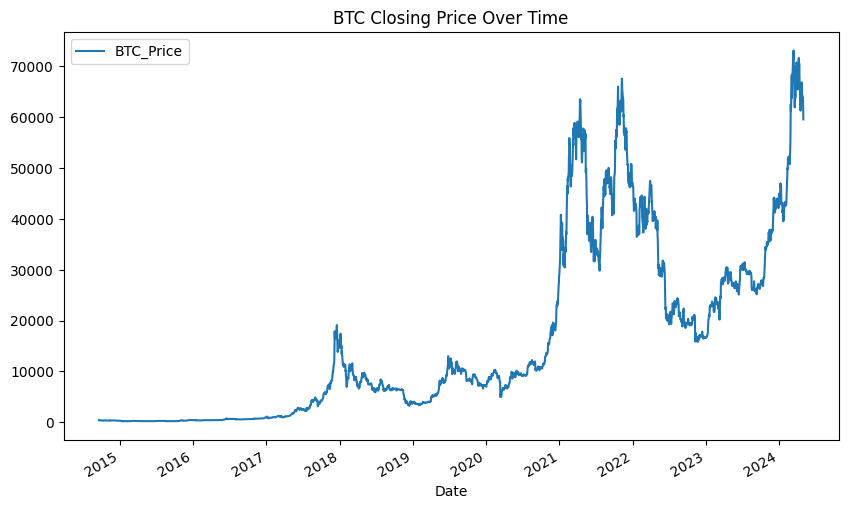

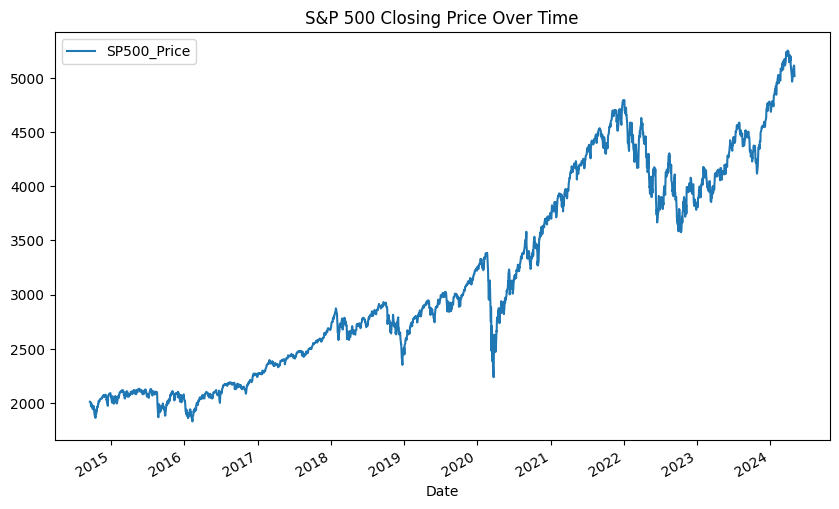

In [150]:
# BTC Closing Price
btc_data.plot(x='Date', y='BTC_Price', title='BTC Closing Price Over Time', figsize=(10, 6))
plt.show()

# S&P 500 Closing Price
sp500_data.plot(x='Date', y='SP500_Price', title='S&P 500 Closing Price Over Time', figsize=(10, 6))
plt.show()

#### Merging Datasets with the 4 columns needed for this EDA

In [ ]:
# Select the relevant columns for each dataset
btc_selected = btc_data[['Date', 'BTC_Price', 'BTC_Volume']]
sp500_selected = sp500_data[['Date', 'SP500_Price', 'SP500_Volume']]

# Merge both datasets using the column 'Date'
merged_data = pd.merge(btc_selected, sp500_selected, on='Date')

# Set the 'Date' column as the index for easier resampling, IMPORTANT!
merged_data.set_index('Date', inplace=True)

merged_data.to_csv('./Data/btc_sp500_price_volume_merged.csv')
merged_data

,BTC_Price,BTC_Volume,SP500_Price,SP500_Volume
Date,,,,
2014-09-18,424.440002,3.448320e+07,2011.359985,3235340000
2014-09-19,394.795990,3.791970e+07,2010.400024,4880220000
2014-09-22,402.152008,2.412760e+07,1994.290039,3349670000
2014-09-23,435.790985,4.509950e+07,1982.770020,3279350000
2014-09-24,423.204987,3.062770e+07,1998.300049,3313850000
...,...,...,...,...
2024-04-24,64276.898438,3.027666e+10,5071.629883,3656740000
2024-04-25,64481.707031,3.215579e+10,5048.419922,3958050000
2024-04-26,63755.320313,2.413937e+10,5099.959961,3604140000


#### Resample data to calculate: total transacion volume and prices for different intervals

In [152]:
# Resample the data to calculate mean prices for different intevals
weekly_data = merged_data.resample('W').mean()
monthly_data = merged_data.resample('ME').mean()
quarterly_data = merged_data.resample('QE').mean()
annual_data = merged_data.resample('YE').mean()

# Function for resample, group and sum different volumes in different frequencies
def analyze_volume_by_frequency(data, freq):
  return data.resample(freq).agg({
    'BTC_Volume': 'sum',
    'SP500_Volume': 'sum'
  })
  
weekly_volume = analyze_volume_by_frequency(merged_data, 'W')
monthly_volume = analyze_volume_by_frequency(merged_data, 'ME')
quarterly_volume = analyze_volume_by_frequency(merged_data, 'QE')
annual_volume = analyze_volume_by_frequency(merged_data, 'YE')

#### Plot the results to visualize trends in Prices and Volume for BTC and S&P 500

In [158]:
# Function for plot both Prices and Volume for the datasets
def plt_btc_sp500(
  data,                 # Name of the DataFrame like weekly_data or weekly_volume
  y_column_btc,         # column for price or volume of BTC
  y_column_sp500,       # column for price or volume of S&P 500
  label_btc,            # e.g. 'Bitcoin Price', 'Bitcoin Volume'
  label_sp500,          # e.g. 'S&P 500 Price', 'S&P 500 Volume'
  title,                # title for the graph like: Weekly average prices for BTC, Weekly volume for BTC 
  ylabel,               # label for the Y axe e.g. 'Average Price (USD)', 'Transaction Volume'
  figsize=(12, 6)       # size of the graph
):
  plt.figure(figsize=figsize)
  plt.plot(data.index, data[y_column_btc], label=label_btc, alpha=0.8)
  plt.plot(data.index, data[y_column_sp500], label=label_sp500, alpha=0.8)
  plt.title(title)
  plt.xlabel('Date')
  plt.ylabel(ylabel)
  plt.legend()
  plt.grid(True)
  plt.show()

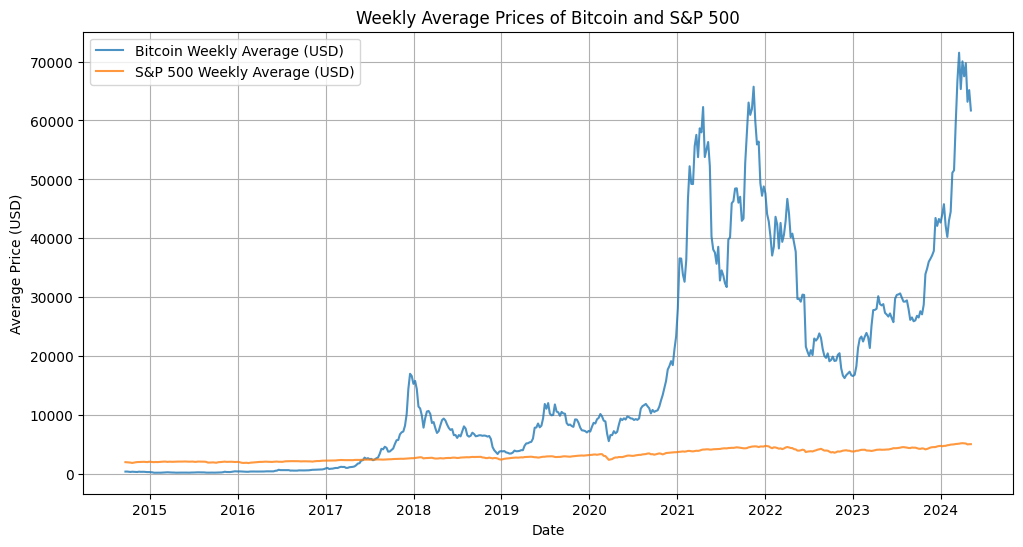

In [160]:
plt_btc_sp500(
  data=weekly_data,
  y_column_btc='BTC_Price',
  y_column_sp500='SP500_Price',
  label_btc='Bitcoin Weekly Average (USD)',
  label_sp500='S&P 500 Weekly Average (USD)',
  title='Weekly Average Prices of Bitcoin and S&P 500',
  ylabel='Average Price (USD)'
)

# # Weekly Trend Price
# plt.figure(figsize=(12, 6))
# plt.plot(weekly_data.index, weekly_data['BTC_Price'], label='Bitcoin (Weekly Average)', alpha=0.8)
# plt.plot(weekly_data.index, weekly_data['SP500_Price'], label='S&P 500 (Weekly Average)', alpha=0.8)
# plt.title('Weekly Average Prices of Bitcoin and S&P 500')
# plt.xlabel('Date')
# plt.ylabel('Average Price')
# plt.legend()
# plt.grid(True)
# plt.show()

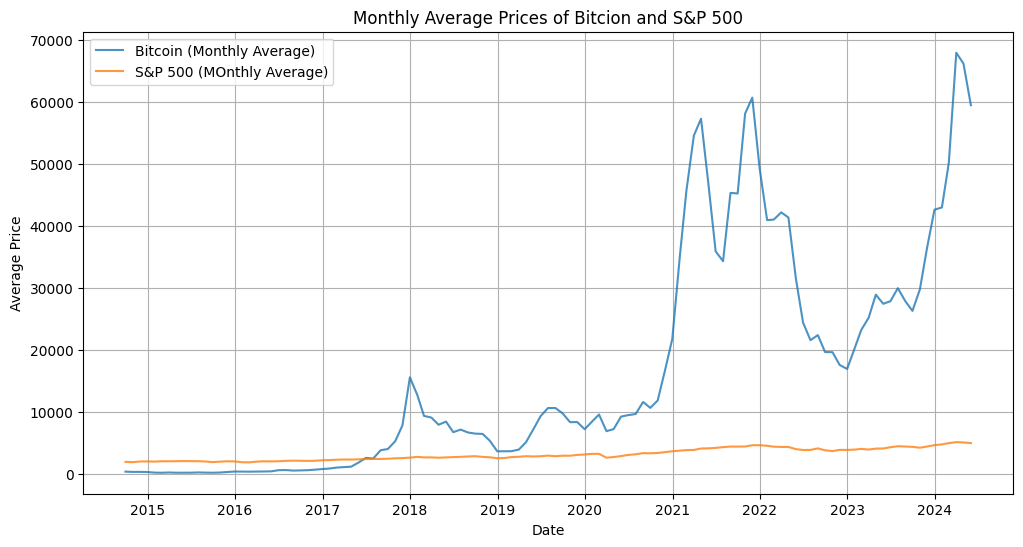

In [155]:
# Monthly Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['BTC_Price'], label='Bitcoin (Monthly Average)', alpha=0.8)
plt.plot(monthly_data.index, monthly_data['SP500_Price'], label='S&P 500 (MOnthly Average)', alpha=0.8)
plt.title('Monthly Average Prices of Bitcion and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

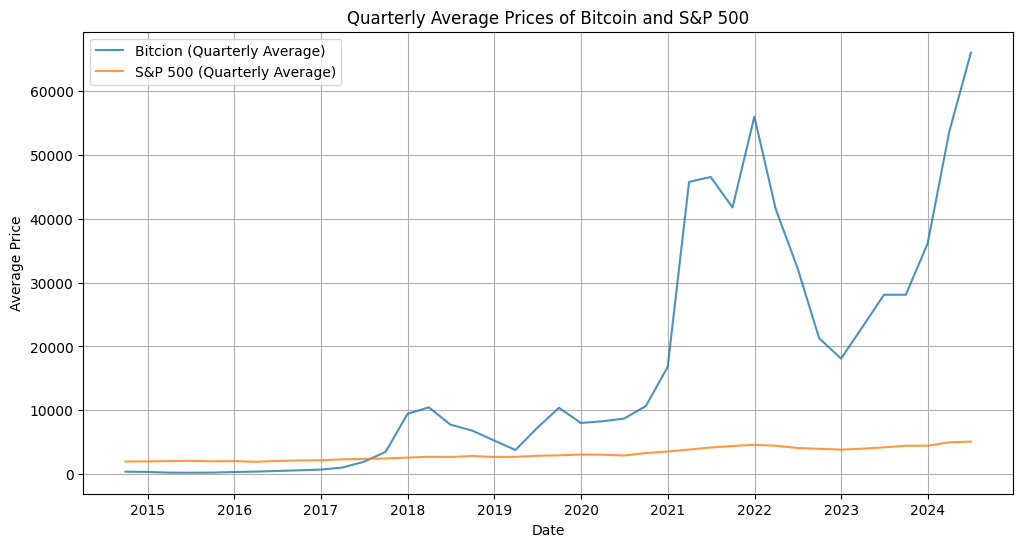

In [156]:
# Quarterly trend
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, quarterly_data['BTC_Price'], label='Bitcion (Quarterly Average)', alpha=0.8)
plt.plot(quarterly_data.index, quarterly_data['SP500_Price'], label='S&P 500 (Quarterly Average)', alpha=0.8)
plt.title('Quarterly Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

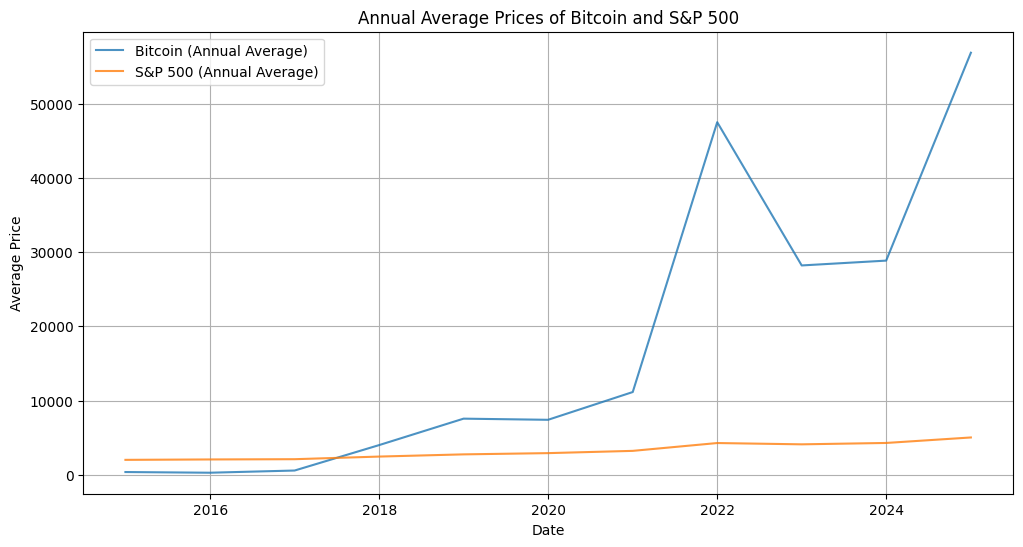

In [157]:
# Annual Trend
plt.figure(figsize=(12, 6))
plt.plot(annual_data.index, annual_data['BTC_Price'], label='Bitcoin (Annual Average)', alpha=0.8)
plt.plot(annual_data.index, annual_data['SP500_Price'], label='S&P 500 (Annual Average)', alpha=0.8)
plt.title('Annual Average Prices of Bitcoin and S&P 500')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()